In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from concurrent.futures import ProcessPoolExecutor

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# **Loading Images of Particular layer**

In [ ]:
#Function to load all 14 images corresponding to particular layer
"""
    Load all 14 images for the given layer number.

    Args:
        layer_num (int): The layer number to load images for.
        base_folder (str): Path to the 'Processed_Data' folder.

    Returns:
        dict: A dictionary with folder names as keys and corresponding images as values.
"""

def load_layer_images(layer_num, base_folder):
    image_data = {}
    subfolders = [f for f in os.listdir(base_folder) if os.path.isdir(os.path.join(base_folder, f))]

    for folder in subfolders:
        folder_path = os.path.join(base_folder, folder)

        # Check for both possible naming formats: "_visible0" or "_visible1"
        for suffix in ["_powder.png","_printed.png","_defect2.png","_defect3.png","_defect4.png","_defect5.png",
                     "_defect6.png","_defect7.png","_defect8.png","_defect9.png","_defect9.png","_defect10.png","_defect11.png","_visible0.png", "_visible1.png"]:
            img_path = os.path.join(folder_path, f"layer_{layer_num}{suffix}")
            if os.path.exists(img_path):
                image_data[f"{folder} ({suffix})"] = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    return image_data


# **Visualising Sample Images**

In [ ]:
main_data_path = '/content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data'
layer_num = 4 # range [0,3574]

In [ ]:
images = load_layer_images(layer_num, main_data_path)

KeyboardInterrupt: 

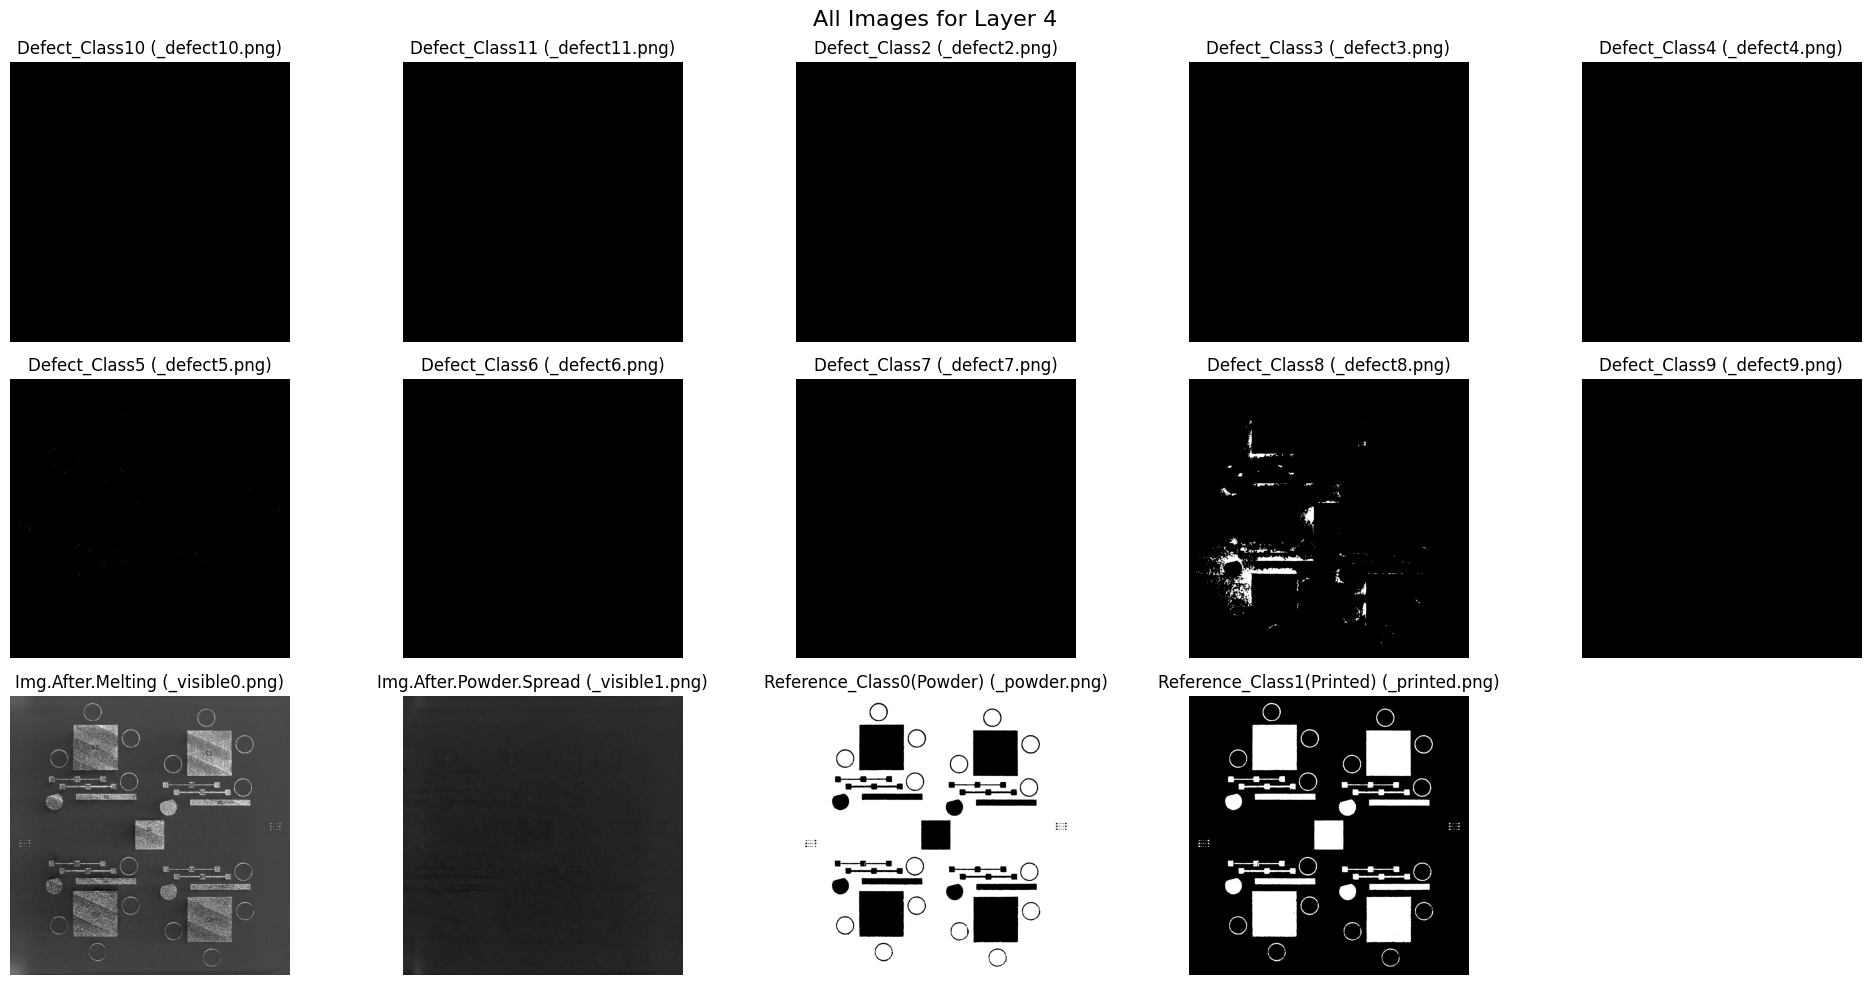

In [ ]:
# Plot images
plt.figure(figsize=(20, 10))
for i, (folder, img) in enumerate(images.items()):
    plt.subplot(3, 5, i + 1)  # Adjust grid as needed
    if img is not None:
        plt.imshow(img, cmap='gray')
    plt.title(folder)
    plt.axis('off')

plt.suptitle(f"All Images for Layer {layer_num}", fontsize=16)
plt.tight_layout()
plt.show()

## **Pixel Intensity Analysis**

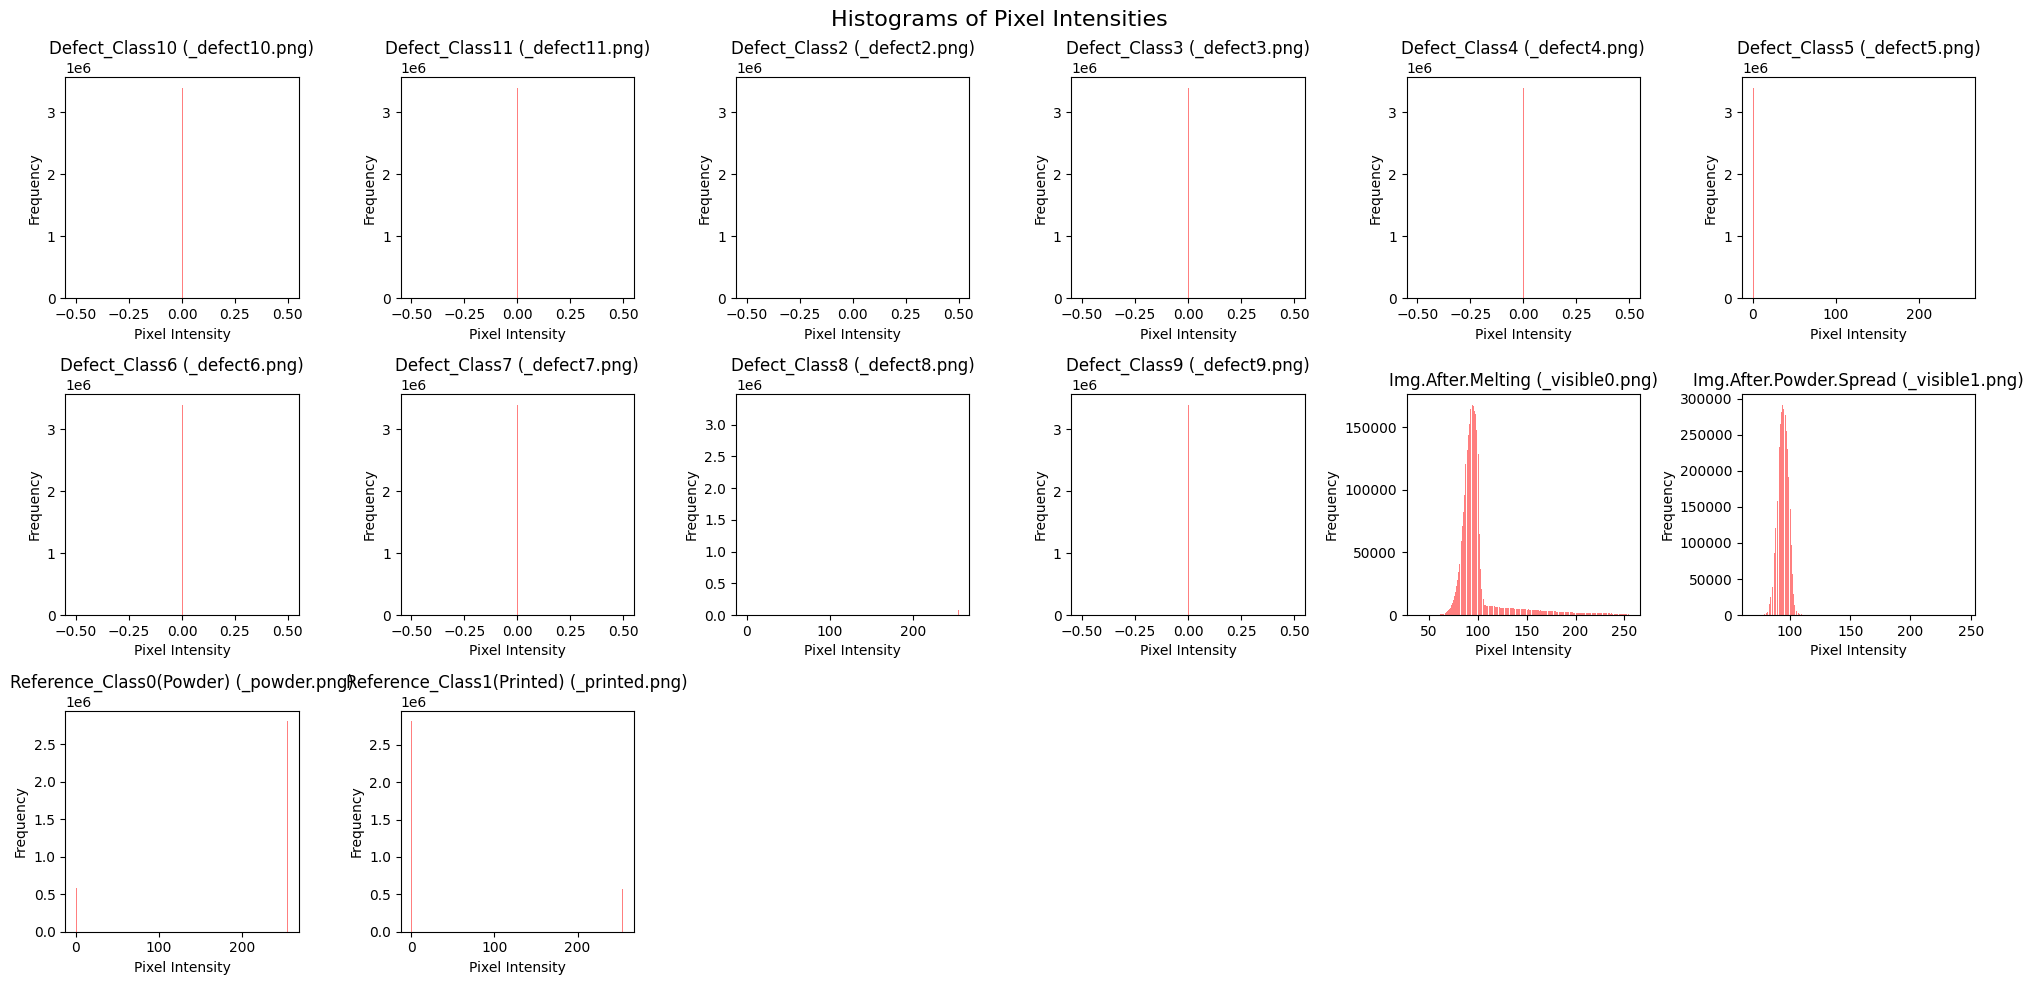

In [ ]:
plt.figure(figsize=(20, 10))
for i, (folder, img) in enumerate(images.items()):
  if img is not None:
    plt.subplot(3, 6, i + 1)  # Arrange in grid
    plt.hist(img.ravel(), bins=256, alpha=0.5, color="red")
    plt.xlabel("Pixel Intensity")
    plt.ylabel("Frequency")
    plt.title(folder)

plt.suptitle("Histograms of Pixel Intensities", fontsize=16)
plt.tight_layout()
plt.show()

# **Defect Area Distribution Analysis**

In [ ]:
#Function to calculate defect areas
def calculate_defect_area(folder):
    total_defect_area = 0
    image_files = [f for f in os.listdir(folder) if f.endswith(('.png', '.jpg', '.jpeg'))]

    for img_file in image_files:
        img_path = os.path.join(folder, img_file)
        mask = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        if mask is None:
            continue  # Skip this image if it cannot be read

        defect_area = np.count_nonzero(mask)  # Count nonzero (defect) pixels
        total_defect_area += defect_area

    return total_defect_area

In [ ]:
def parallel_defect_analysis(folder_paths):
    with ProcessPoolExecutor() as executor:
        results = executor.map(calculate_defect_area, folder_paths)

    return dict(zip(folder_paths, results))

In [ ]:
before_melting_folders = ["Defect_Class2", "Defect_Class3", "Defect_Class4", "Defect_Class6", "Defect_Class7"]
after_melting_folders = ["Defect_Class5", "Defect_Class8", "Defect_Class9", "Defect_Class10", "Defect_Class11"]

In [ ]:
before_melting_folder_paths = [os.path.join(main_data_path, folder) for folder in before_melting_folders]
after_melting_folder_paths = [os.path.join(main_data_path, folder) for folder in after_melting_folders]

In [ ]:
defect_data_before = parallel_defect_analysis(before_melting_folder_paths)
defect_data_after = parallel_defect_analysis(after_melting_folder_paths)


print("Defect Area Distribution (Before Melting):", defect_data_before)
print("Defect Area Distribution (After Melting):", defect_data_after)


Defect Area Distribution (Before Melting): {'/content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class2': 0, '/content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class3': 3965232, '/content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class4': 1175512, '/content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class6': 0, '/content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class7': 10}
Defect Area Distribution (After Melting): {'/content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class5': 3021601, '/content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class8': 110397626, '/content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class9': 8124, '/content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class10': 0, '/content

<ipython-input-28-7dba0e84a3e9>:23: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[0].set_xticklabels(defect_data_before.keys(), rotation=45)
<ipython-input-28-7dba0e84a3e9>:27: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax[1].set_xticklabels(defect_data_after.keys(), rotation=45)


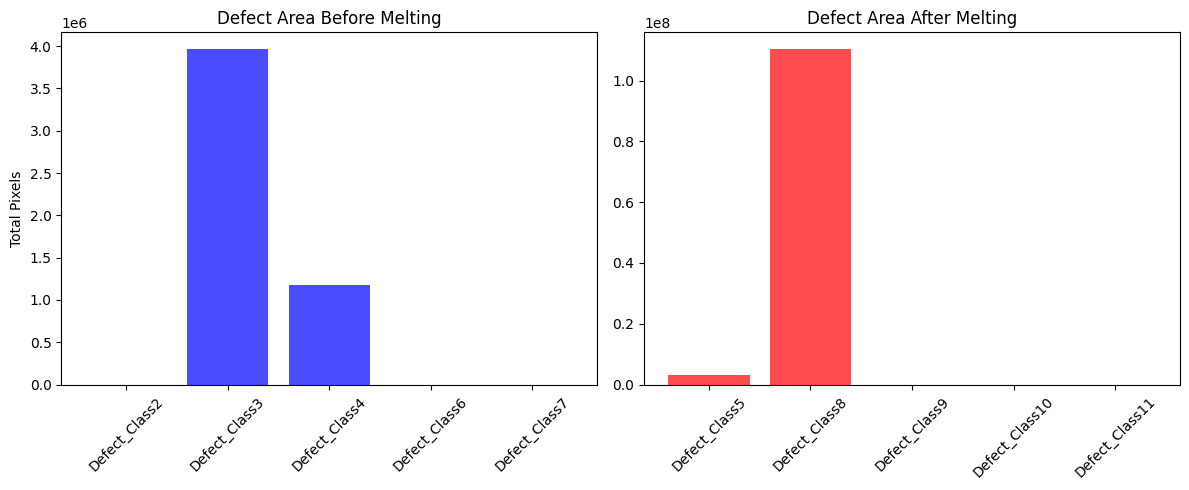

In [ ]:
defect_data_before = {
    "Defect_Class2": 0,
    "Defect_Class3": 3965232,
    "Defect_Class4": 1175512,
    "Defect_Class6": 0,
    "Defect_Class7": 10
}

defect_data_after = {
    "Defect_Class5": 3021601,
    "Defect_Class8": 110397626,
    "Defect_Class9": 8124,
    "Defect_Class10": 0,
    "Defect_Class11": 0
}

# Bar plot for total defect areas
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

ax[0].bar(defect_data_before.keys(), defect_data_before.values(), color='blue', alpha=0.7)
ax[0].set_title("Defect Area Before Melting")
ax[0].set_ylabel("Total Pixels")
ax[0].set_xticklabels(defect_data_before.keys(), rotation=45)

ax[1].bar(defect_data_after.keys(), defect_data_after.values(), color='red', alpha=0.7)
ax[1].set_title("Defect Area After Melting")
ax[1].set_xticklabels(defect_data_after.keys(), rotation=45)

plt.tight_layout()
plt.show()


# **Defect Location Heatmaps**

In [ ]:
from tqdm import tqdm

Processing /content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class2: 100%|██████████| 3575/3575 [02:46<00:00, 21.47it/s]
Processing /content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class3: 100%|██████████| 3575/3575 [02:55<00:00, 20.41it/s]
Processing /content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class4: 100%|██████████| 3575/3575 [03:02<00:00, 19.61it/s]
Processing /content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class6: 100%|██████████| 3575/3575 [02:52<00:00, 20.77it/s]
Processing /content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class7: 100%|██████████| 3575/3575 [02:57<00:00, 20.11it/s]
Processing /content/drive/MyDrive/Info_Project/Defect_Detection/DataSets/Processed_Data/Defect_Class5: 100%|██████████| 3575/3575 [02:56<00:00, 20.23it/s]
Processing /content/drive/MyDrive/Info_Project/Defect_Detection/DataSe

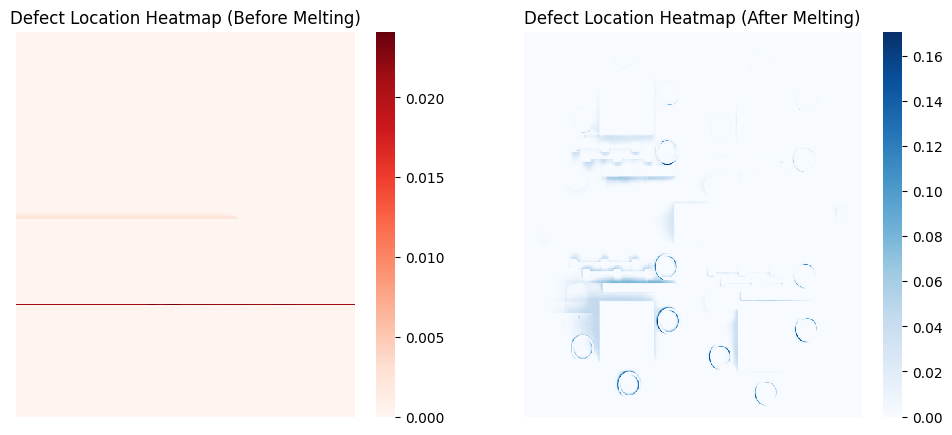

In [ ]:
# Function to accumulate defect locations
def generate_defect_heatmap(folder_paths, img_size=(512, 512)):
    heatmap = np.zeros(img_size, dtype=np.float32)
    total_images = 0

    for folder in folder_paths:

        for filename in tqdm(os.listdir(folder), desc=f"Processing {folder}"):
            file_path = os.path.join(folder, filename)
            mask = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)

            if mask is None:
                continue

            mask = cv2.resize(mask, img_size)  # Resize to fixed size
            mask = mask / 255.0
            heatmap += mask
            total_images += 1

    # Normalize heatmap
    if total_images > 0:
        heatmap /= total_images

    return heatmap

# Generate heatmaps
heatmap_before = generate_defect_heatmap(before_melting_folder_paths)
heatmap_after = generate_defect_heatmap(after_melting_folder_paths)

# Plot heatmaps
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.heatmap(heatmap_before, cmap="Reds", cbar=True, ax=axes[0])
axes[0].set_title("Defect Location Heatmap (Before Melting)")
axes[0].axis("off")

sns.heatmap(heatmap_after, cmap="Blues", cbar=True, ax=axes[1])
axes[1].set_title("Defect Location Heatmap (After Melting)")
axes[1].axis("off")

plt.show()

# **Defect Class Frequency Analysis**

In [14]:
# Count the number of images with defects in each defect class
def count_defect_images(folder_paths):
    defect_counts = {}
    for folder_path in folder_paths:
        folder_name = os.path.basename(folder_path)
        if os.path.exists(folder_path):
            count = 0
            for img_file in os.listdir(folder_path):
                img_path = os.path.join(folder_path, img_file)
                mask = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
                if mask is not None and np.sum(mask) > 0:  # Check if the mask has any defect pixels
                    count += 1
            defect_counts[folder_name] = count
        else:
            defect_counts[folder_name] = 0  # If folder doesn't exist, set count to 0
    return defect_counts


In [16]:
# Defect class frequencies
after_melting_defect_counts = count_defect_images(after_melting_folder_paths)
before_melting_defect_counts = count_defect_images(before_melting_folder_paths)

In [17]:
after_melting_defect_counts

{'Defect_Class5': 3573,
 'Defect_Class8': 3573,
 'Defect_Class9': 119,
 'Defect_Class10': 0,
 'Defect_Class11': 0}

In [18]:
before_melting_defect_counts

{'Defect_Class2': 0,
 'Defect_Class3': 819,
 'Defect_Class4': 67,
 'Defect_Class6': 0,
 'Defect_Class7': 1}

<ipython-input-28-17929626f8b1>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(after_melting_defect_counts.keys()), y=list(after_melting_defect_counts.values()), palette="magma", ax=axes[1])
<ipython-input-28-17929626f8b1>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(before_melting_defect_counts.keys()), y=list(before_melting_defect_counts.values()), palette="magma", ax=axes[0])


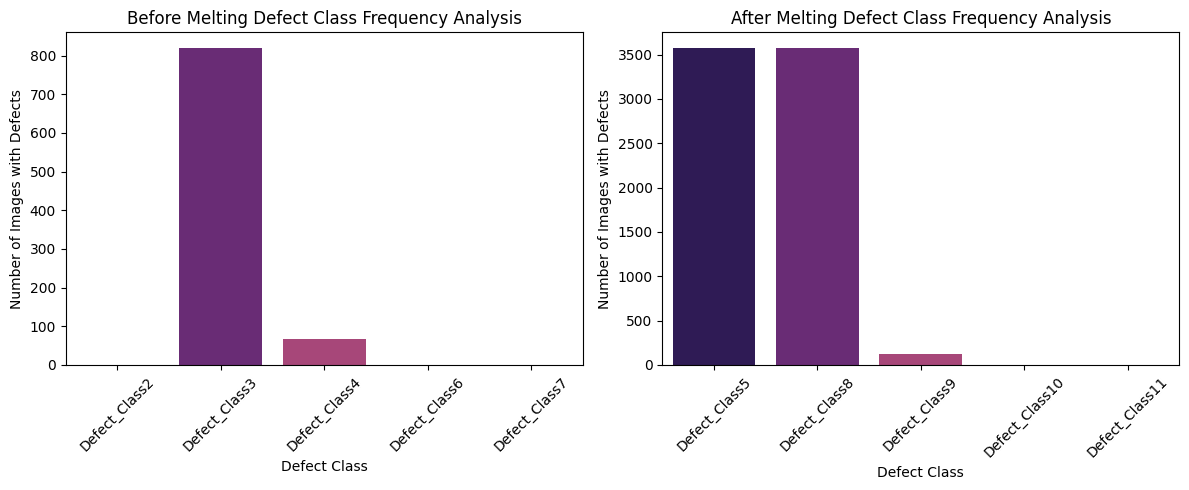

In [28]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Before Melting Defect Frequency Plot
sns.barplot(x=list(after_melting_defect_counts.keys()), y=list(after_melting_defect_counts.values()), palette="magma", ax=axes[1])
axes[1].set_xlabel("Defect Class")
axes[1].set_ylabel("Number of Images with Defects")
axes[1].set_title("After Melting Defect Class Frequency Analysis")
axes[1].tick_params(axis='x', rotation=45)

# After Melting Defect Frequency Plot
sns.barplot(x=list(before_melting_defect_counts.keys()), y=list(before_melting_defect_counts.values()), palette="magma", ax=axes[0])
axes[0].set_xlabel("Defect Class")
axes[0].set_ylabel("Number of Images with Defects")
axes[0].set_title("Before Melting Defect Class Frequency Analysis")
axes[0].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

